<a href="https://colab.research.google.com/github/maulanaridhwan/BRIN_Project/blob/main/Prediksi_Status_Kapasitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Prediksi Status Kapasitor dengan Random Forest di Instalasi Pengelolaan Limbah Radioaktif**

## **Import and Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/DATA SISTEM CAPASITOR BANK (1).xlsx')
df

,TANGGAL_PELAKSANAAN,FAKTOR_DAYA,LINE_VOLTAGE_LN,APPARENT_CURRENT,REACTIVE_POWER,ACTIVE_POWER,APPARENT_POWER,DIFF_TO_PF,FREQUENCY,TEMPERATURE,...,MODUL_3,MODUL_4,MODUL_5,MODUL_6,MODUL_7,MODUL_8,MODUL_9,MODUL_10,MODUL_11,MODUL_12
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,1.00,217.0,105.0,5.0,68.0,69.0,-9.0,50.0,32.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
361,2023-12-28,0.97,221.0,199.0,33.0,128.0,132.0,7.0,50.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
362,2023-12-29,0.97,222.0,193.0,32.0,124.0,128.0,7.0,50.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
363,2023-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TANGGAL_PELAKSANAAN  365 non-null    datetime64[ns]
 1   FAKTOR_DAYA          193 non-null    float64       
 2    LINE_VOLTAGE_LN     189 non-null    float64       
 3   APPARENT_CURRENT     189 non-null    float64       
 4   REACTIVE_POWER       189 non-null    float64       
 5    ACTIVE_POWER        189 non-null    float64       
 6   APPARENT_POWER       189 non-null    float64       
 7   DIFF_TO_PF           189 non-null    float64       
 8   FREQUENCY            189 non-null    float64       
 9   TEMPERATURE          189 non-null    float64       
 10  HARMONICS_V          189 non-null    float64       
 11  HARMONICS_I          189 non-null    float64       
 12  HARMONICS_THD_V      189 non-null    float64       
 13  HARMONICS_THD_I      189 non-null  

## **Data Cleaning**

In [ ]:
df_cleaned = df.dropna()

Dalam proses pembersihan data, penggunaan dropna berfungsi untuk menghapus baris atau kolom yang mengandung nilai NaN (Not a Number) atau data yang hilang. Pada dataset yang sangat terbatas, mengisi nilai yang hilang dengan metode seperti mean, modus, atau nilai acak bisa memperkenalkan bias dan menyebabkan ketidakseimbangan data. Ketidakseimbangan ini dapat berdampak negatif pada kinerja model karena model mungkin belajar dari pola yang tidak akurat atau tidak representatif.

Dengan menggunakan dropna, kita memastikan bahwa hanya data yang lengkap dan valid yang digunakan untuk pelatihan model. Hal ini dapat membantu model untuk lebih akurat dalam memprediksi karena data yang digunakan adalah data yang benar-benar ada dan representatif. Meskipun ada kekhawatiran mengenai pengurangan ukuran dataset, pendekatan ini diharapkan menjadi jalan terbaik untuk menjaga kualitas data dan meningkatkan kinerja model dalam memprediksi.


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 30 to 362
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TANGGAL_PELAKSANAAN  181 non-null    datetime64[ns]
 1   FAKTOR_DAYA          181 non-null    float64       
 2    LINE_VOLTAGE_LN     181 non-null    float64       
 3   APPARENT_CURRENT     181 non-null    float64       
 4   REACTIVE_POWER       181 non-null    float64       
 5    ACTIVE_POWER        181 non-null    float64       
 6   APPARENT_POWER       181 non-null    float64       
 7   DIFF_TO_PF           181 non-null    float64       
 8   FREQUENCY            181 non-null    float64       
 9   TEMPERATURE          181 non-null    float64       
 10  HARMONICS_V          181 non-null    float64       
 11  HARMONICS_I          181 non-null    float64       
 12  HARMONICS_THD_V      181 non-null    float64       
 13  HARMONICS_THD_I      181 non-null    fl

## **Explaratory Data Analysis (EDA)**

In [ ]:
# Menghapus kolom MODUL 1 hingga MODUL 12 dan TANGGAL PELAKSANAAN
columns_to_exclude = [f'MODUL_{i}' for i in range(1, 13)] + ['TANGGAL_PELAKSANAAN']
columns_to_exclude

['MODUL_1',
 'MODUL_2',
 'MODUL_3',
 'MODUL_4',
 'MODUL_5',
 'MODUL_6',
 'MODUL_7',
 'MODUL_8',
 'MODUL_9',
 'MODUL_10',
 'MODUL_11',
 'MODUL_12',
 'TANGGAL_PELAKSANAAN']

### **Statistik Deskriptif**

In [ ]:
df_describe = df_cleaned.drop(columns=['MODUL_1', 'MODUL_2', 'MODUL_3', 'MODUL_4', 'MODUL_5', 'MODUL_6', 'MODUL_7', 'MODUL_8', 'MODUL_9', 'MODUL_10', 'MODUL_11', 'MODUL_12', 'TANGGAL_PELAKSANAAN'])

# Melakukan deskripsi pada dataset yang sudah dihapus kolom MODUL 1 hingga 12
df_describe.describe()

,FAKTOR_DAYA,LINE_VOLTAGE_LN,APPARENT_CURRENT,REACTIVE_POWER,ACTIVE_POWER,APPARENT_POWER,DIFF_TO_PF,FREQUENCY,TEMPERATURE,HARMONICS_V,HARMONICS_I,HARMONICS_THD_V,HARMONICS_THD_I
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.977514,220.093923,190.867403,25.668508,123.425414,126.646409,0.828729,50.0,30.033149,0.359116,0.621547,1.876243,5.558564
std,0.014564,2.901535,37.062771,12.920722,24.271868,26.497733,8.557547,0.0,2.615978,0.088740,0.388058,0.248862,1.581454
min,0.910000,213.000000,93.000000,-14.000000,62.000000,62.000000,-24.000000,50.0,12.000000,0.200000,0.000000,1.100000,1.200000
25%,0.970000,218.000000,180.000000,18.000000,117.000000,120.000000,-7.000000,50.0,28.000000,0.300000,0.400000,1.700000,4.300000
50%,0.980000,220.000000,198.000000,27.000000,127.000000,130.000000,3.000000,50.0,31.000000,0.300000,0.600000,1.800000,5.600000
75%,0.990000,222.000000,219.000000,33.000000,140.000000,144.000000,7.000000,50.0,32.000000,0.400000,0.800000,2.000000,6.700000
max,1.000000,232.000000,292.000000,129.000000,191.000000,262.000000,49.000000,50.0,33.000000,0.700000,3.500000,3.300000,9.500000


### **Korelasi**

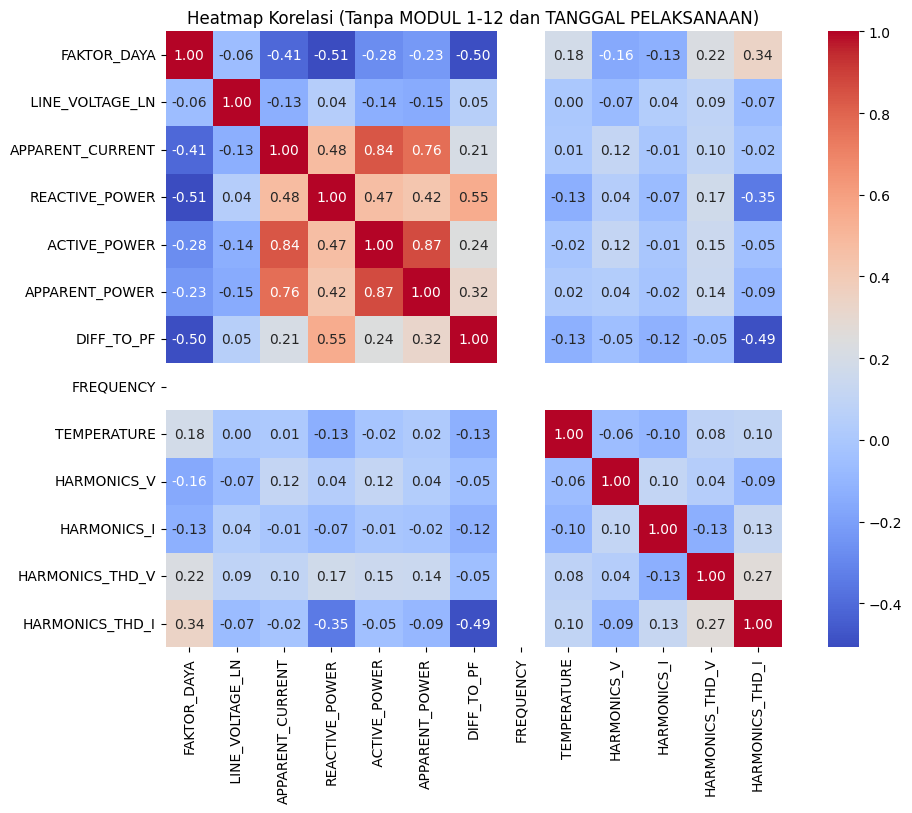

In [ ]:
df_correlation = df_cleaned.drop(columns=columns_to_exclude)

# Convert the TEMPERATURE column to string first
df_correlation['TEMPERATURE'] = df_correlation['TEMPERATURE'].astype(str)

# Mengonversi kolom TEMPERATURE ke tipe data numerik (hanya nilai angka)
df_correlation['TEMPERATURE'] = pd.to_numeric(df_correlation['TEMPERATURE'].str.extract('(\d+)')[0], errors='coerce')

# Menghitung matriks korelasi
correlation_matrix = df_correlation.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi (Tanpa MODUL 1-12 dan TANGGAL PELAKSANAAN)')
plt.show()

Hasil korelasi menunjukkan seberapa kuat hubungan linier antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1. Nilai yang mendekati 1 atau -1 menunjukkan hubungan yang kuat, sedangkan nilai mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan.

Berikut adalah beberapa poin penting dari hasil korelasi yang diberikan:

1. FAKTOR DAYA dan APPARENT CURRENT memiliki korelasi negatif yang moderat (-0.411472), yang berarti ketika APPARENT CURRENT meningkat, FAKTOR DAYA cenderung menurun.

2. APPARENT CURRENT dan ACTIVE POWER memiliki korelasi positif yang sangat kuat (0.836914), yang menunjukkan bahwa ketika APPARENT CURRENT meningkat, ACTIVE POWER juga cenderung meningkat.

3. APPARENT CURRENT dan APPARENT POWER juga memiliki korelasi positif yang kuat (0.764464), yang menunjukkan hubungan erat antara kedua variabel tersebut.

4. REACTIVE POWER dan DIFF TO PF memiliki korelasi positif moderat (0.550971), menunjukkan bahwa ketika REACTIVE POWER meningkat, DIFF TO PF juga cenderung meningkat.

Namun, terdapat variabel seperti FREQUENCY yang menunjukkan nilai NaN pada seluruh hasil korelasinya.

**Mengapa FREQUENCY Bernilai NaN?**

Nilai NaN dalam hasil korelasi menunjukkan bahwa perhitungan korelasi untuk variabel tersebut tidak dapat dilakukan. Dalam kasus ini, penyebabnya adalah karena kolom FREQUENCY memiliki nilai unik yang sama untuk semua data, yaitu 50. Berikut adalah alasan lebih detailnya:

Variabilitas Nol: Korelasi mengukur seberapa dua variabel berubah bersama-sama. Jika satu variabel tidak berubah sama sekali (semua nilainya sama), maka tidak ada variabilitas untuk diukur terhadap variabel lain. Oleh karena itu, korelasi tidak dapat dihitung dan hasilnya adalah NaN.

### **Status Tiap Modul Kapasitor**

In [ ]:
# Menghitung jumlah aktif dan non-aktif untuk setiap modul
status_counts = {}
for i in range(1, 13):
    module_column = f'MODUL_{i}'
    active_count = df_cleaned[module_column].value_counts().get(1, 0)
    inactive_count = df_cleaned[module_column].value_counts().get(0, 0)
    status_counts[module_column] = {'Aktif': active_count, 'Tidak Aktif': inactive_count}

# Mengubah dictionary menjadi DataFrame untuk visualisasi
status_df = pd.DataFrame(status_counts).T

# Menampilkan jumlah aktif dan non-aktif
status_df

,Aktif,Tidak Aktif
MODUL_1,88,93
MODUL_2,79,102
MODUL_3,17,164
MODUL_4,16,165
MODUL_5,25,156
MODUL_6,21,160
MODUL_7,24,157
MODUL_8,23,158
MODUL_9,26,155
MODUL_10,23,158


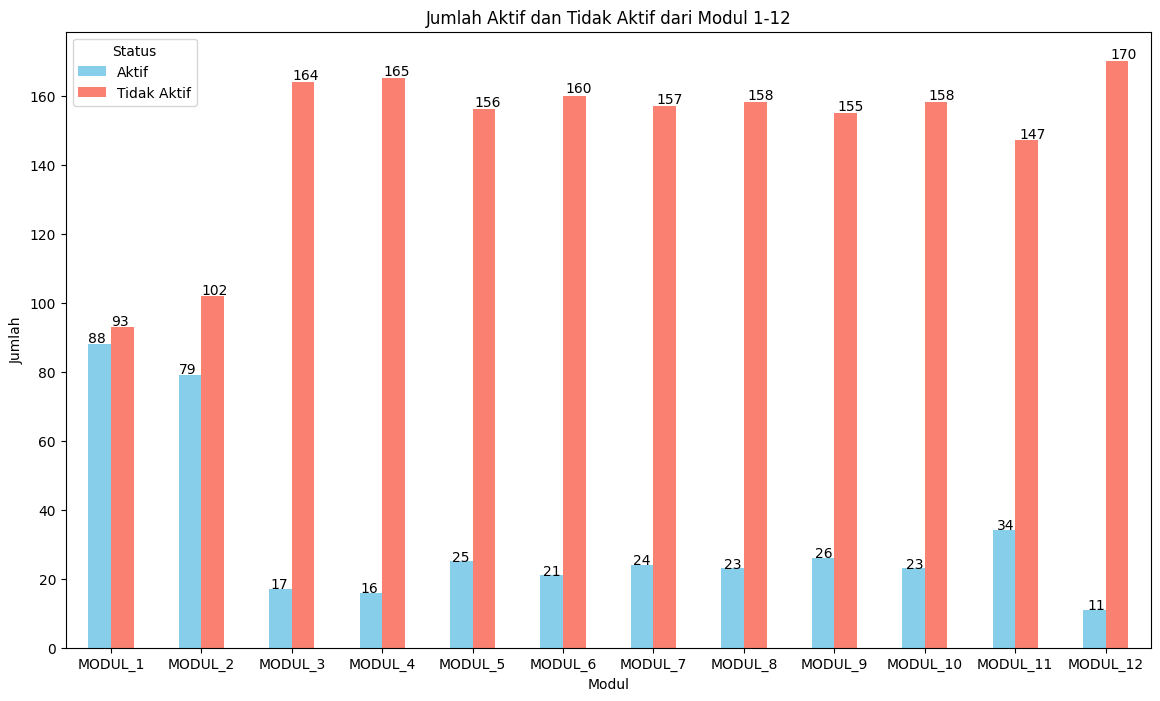

In [ ]:
# Visualisasi jumlah aktif dan non-aktif
fig, ax = plt.subplots(figsize=(14, 8))
status_df.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

# Menampilkan nilai di atas masing-masing bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Menambahkan judul dan label
plt.title('Jumlah Aktif dan Tidak Aktif dari Modul 1-12')
plt.xlabel('Modul')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

Hasil analisis pada status aktif dan tidak aktif dari setiap modul menunjukkan adanya ketidakseimbangan yang cukup signifikan dalam data.

Dari tabel ataupun grafik yang disajikan, terlihat bahwa jumlah status aktif pada setiap modul secara umum jauh lebih sedikit dibandingkan dengan status tidak aktif. Modul 3 - 12 memiliki ketidakseimbangan yang sangat jelas dengan jumlah status tidak aktif yang jauh lebih banyak daripada status aktif.

Ketidakseimbangan label data ini bisa menjadi masalah signifikan dalam proses pemodelan. Ketika data yang digunakan untuk melatih model sangat tidak seimbang, model cenderung belajar lebih baik dalam mengenali kelas yang dominan (dalam hal ini, status tidak aktif) dan kurang efektif dalam mengenali kelas yang kurang dominan (status aktif). Hal ini dapat menyebabkan bias dalam prediksi, di mana model mungkin memiliki tingkat kesalahan yang tinggi dalam memprediksi status aktif dibandingkan dengan status tidak aktif.

## **Modeling**

### Modelling dengan menggunakan SMOTE

Modul: MODUL_1
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        24
         1.0       0.85      0.85      0.85        13

    accuracy                           0.89        37
   macro avg       0.88      0.88      0.88        37
weighted avg       0.89      0.89      0.89        37



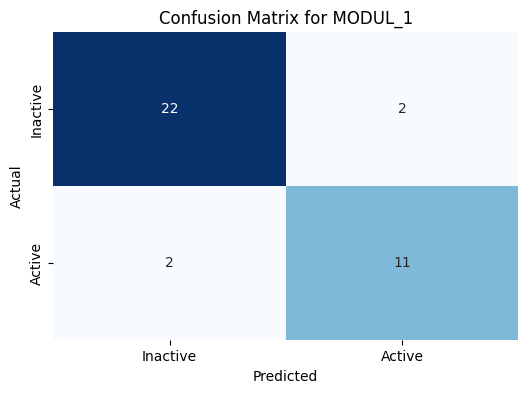

Modul: MODUL_2
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        20
         1.0       0.82      0.82      0.82        17

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



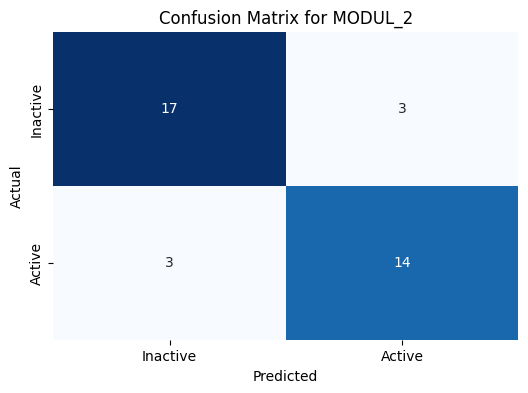

Modul: MODUL_3
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        35
         1.0       0.17      0.50      0.25         2

    accuracy                           0.84        37
   macro avg       0.57      0.68      0.58        37
weighted avg       0.92      0.84      0.87        37



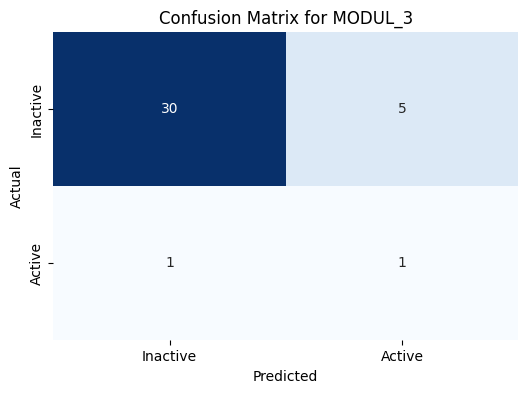

Modul: MODUL_4
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        34
         1.0       0.00      0.00      0.00         3

    accuracy                           0.84        37
   macro avg       0.46      0.46      0.46        37
weighted avg       0.84      0.84      0.84        37



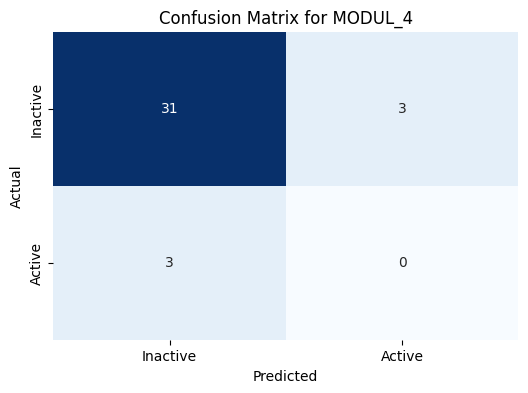

Modul: MODUL_5
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83        28
         1.0       0.00      0.00      0.00         9

    accuracy                           0.70        37
   macro avg       0.37      0.46      0.41        37
weighted avg       0.56      0.70      0.62        37



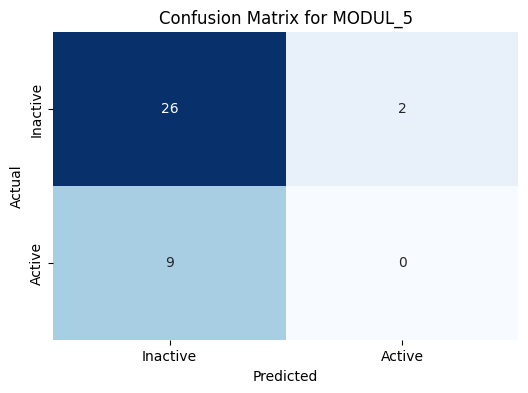

Modul: MODUL_6
              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81        28
         1.0       0.33      0.22      0.27         9

    accuracy                           0.70        37
   macro avg       0.55      0.54      0.54        37
weighted avg       0.67      0.70      0.68        37



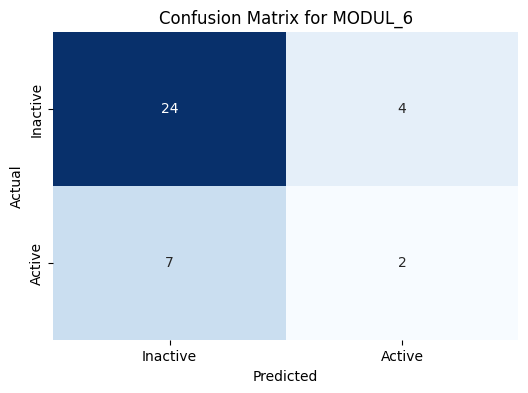

Modul: MODUL_7
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        28
         1.0       0.50      0.22      0.31         9

    accuracy                           0.76        37
   macro avg       0.64      0.58      0.58        37
weighted avg       0.72      0.76      0.72        37



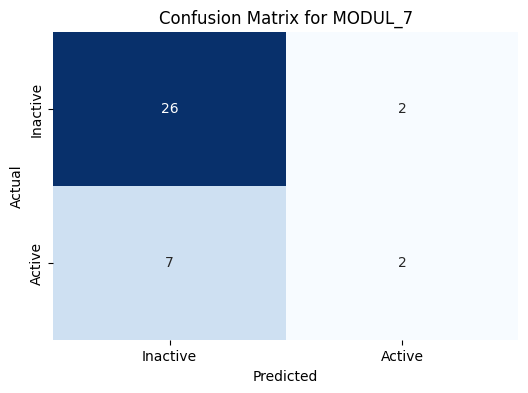

Modul: MODUL_8
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        31
         1.0       0.00      0.00      0.00         6

    accuracy                           0.68        37
   macro avg       0.40      0.40      0.40        37
weighted avg       0.68      0.68      0.68        37



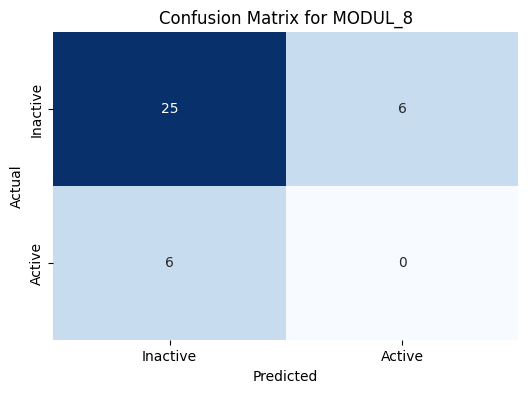

Modul: MODUL_9
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        32
         1.0       0.00      0.00      0.00         5

    accuracy                           0.73        37
   macro avg       0.42      0.42      0.42        37
weighted avg       0.73      0.73      0.73        37



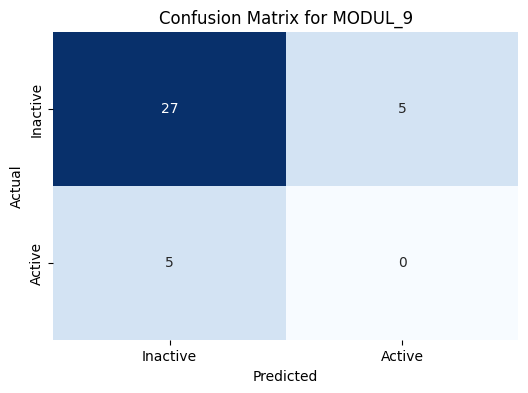

Modul: MODUL_10
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86        32
         1.0       0.00      0.00      0.00         5

    accuracy                           0.76        37
   macro avg       0.42      0.44      0.43        37
weighted avg       0.73      0.76      0.75        37



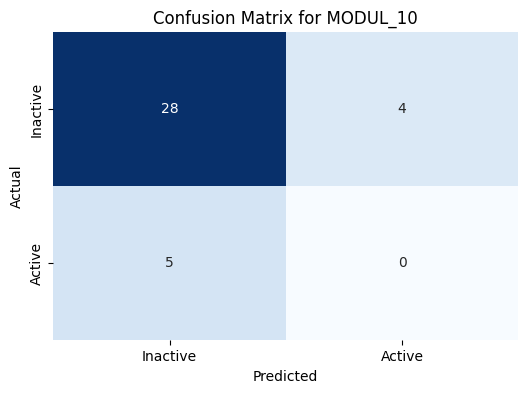

Modul: MODUL_11
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82        36
         1.0       0.08      1.00      0.15         1

    accuracy                           0.70        37
   macro avg       0.54      0.85      0.49        37
weighted avg       0.98      0.70      0.80        37



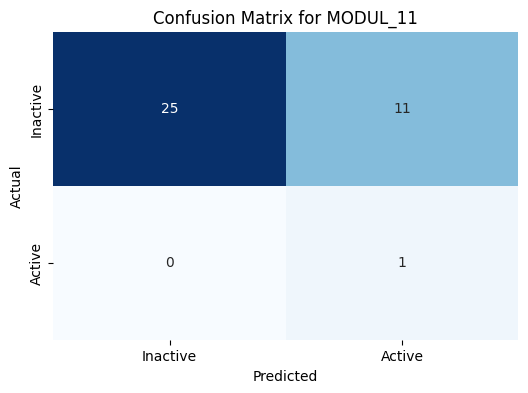

Modul: MODUL_12
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        34
         1.0       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.46      0.47      0.46        37
weighted avg       0.84      0.86      0.85        37



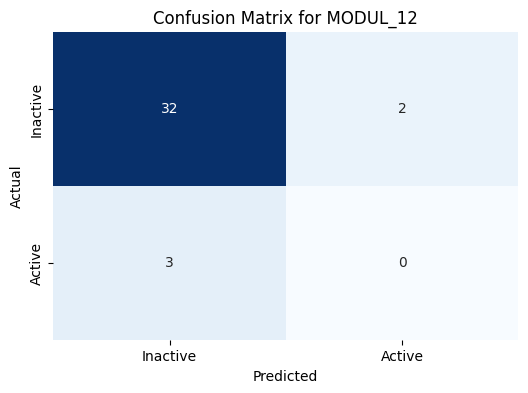

In [ ]:
# Mengonversi semua nilai dalam kolom TEMPERATURE menjadi string terlebih dahulu
df_cleaned['TEMPERATURE'] = df_cleaned['TEMPERATURE'].astype(str)

# Mengekstraksi angka dari nilai string dan mengonversinya menjadi numerik
df_cleaned['TEMPERATURE'] = pd.to_numeric(df_cleaned['TEMPERATURE'].str.extract('(\d+)')[0], errors='coerce')

# Memisahkan fitur dan label
columns_to_exclude = [f'MODUL_{i}' for i in range(1, 13)] + ['TANGGAL_PELAKSANAAN']
X = df_cleaned.drop(columns=columns_to_exclude)
labels = [f'MODUL_{i}' for i in range(1, 13)]
y = df_cleaned[labels]

# Menangani nilai NaN pada fitur dengan menggunakan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi model untuk setiap modul
for label in labels:
    print(f'Modul: {label}')

    # Memisahkan label saat ini
    y_current = y[label]

    # Membagi dataset menjadi training set dan test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_current, test_size=0.2, random_state=42)

    # Menggunakan SMOTE untuk oversampling kelas minoritas pada training set
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Melatih model Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_smote, y_train_smote)

    # Memprediksi dengan model
    y_pred = rf.predict(X_test)

    # Evaluasi model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[label] = report

    # Menampilkan laporan klasifikasi
    print(classification_report(y_test, y_pred))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=["Inactive", "Active"], yticklabels=["Inactive", "Active"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {label}')
    plt.show()


Secara keseluruhan, hasil evaluasi dari berbagai modul menunjukkan variasi dalam performa model klasifikasi. Berikut adalah ringkasan dari hasil evaluasi untuk modul-modul tersebut:

1. Modul 1 dan Modul 2: Menunjukkan performa baik dengan precision dan recall yang tinggi untuk kedua kelas, serta akurasi yang baik (sekitar 0.89 dan 0.84).

2. Modul 3, Modul 4, Modul 8, Modul 9, dan Modul 10: Menunjukkan tantangan dalam memprediksi kelas positif (kelas 1.0) dengan precision dan recall yang rendah untuk kelas 1.0. Akurasi juga cenderung lebih rendah.

3. Modul 5, Modul 6, dan Modul 7: Menunjukkan performa sedang dengan precision, recall, dan f1-score yang moderat untuk kedua kelas.

4. Modul 11: Memiliki recall yang tinggi untuk kelas 1.0, tetapi precision yang sangat rendah menunjukkan masalah dalam mengidentifikasi kelas positif tanpa mengorbankan banyak false positives.

5. Modul 12: Memiliki performa yang cukup baik untuk kelas 0, tetapi gagal memprediksi kelas 1 dengan baik (precision dan recall untuk kelas 1.0 adalah 0.00).



---



In [ ]:
# Data baru yang akan diprediksi
new_data = np.array([[0.97, 223, 197, 33, 127, 131, 8, 50, 31, 0.3, 1.7, 1.9, 5.5]])

# Melakukan imputer pada data baru (menggunakan mean dari data yang dilatih jika ada NaN)
new_data_imputed = imputer.transform(new_data)

# Melakukan prediksi untuk setiap modul menggunakan model yang telah dilatih
predictions = {}
for label in labels:
    rf = RandomForestClassifier(random_state=42)
    y_current = y[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y_current, test_size=0.2, random_state=42)
    rf.fit(X_train, y_train)

    # Prediksi data baru
    prediction = rf.predict(new_data_imputed)
    predictions[label] = prediction[0]

# Menampilkan hasil prediksi
print("Hasil Prediksi untuk Data Baru:")
for label, prediction in predictions.items():
    status = "Active" if prediction == 1 else "Inactive"
    print(f"{label}: {status}")


Hasil Prediksi untuk Data Baru:
MODUL_1: Active
MODUL_2: Active
MODUL_3: Inactive
MODUL_4: Inactive
MODUL_5: Inactive
MODUL_6: Inactive
MODUL_7: Inactive
MODUL_8: Inactive
MODUL_9: Active
MODUL_10: Inactive
MODUL_11: Inactive
MODUL_12: Inactive


### **Modelling tidak menggunakan SMOTE**

Modul: MODUL_1
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        24
         1.0       0.86      0.92      0.89        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



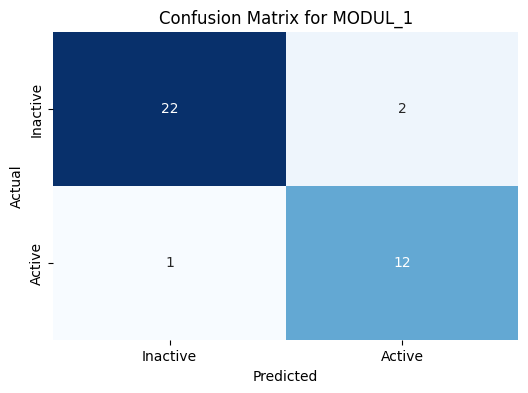

Modul: MODUL_2
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        20
         1.0       0.88      0.82      0.85        17

    accuracy                           0.86        37
   macro avg       0.87      0.86      0.86        37
weighted avg       0.87      0.86      0.86        37



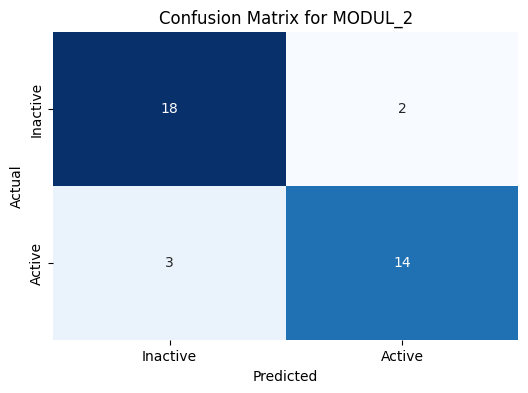

Modul: MODUL_3
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        35
         1.0       0.00      0.00      0.00         2

    accuracy                           0.92        37
   macro avg       0.47      0.49      0.48        37
weighted avg       0.89      0.92      0.91        37



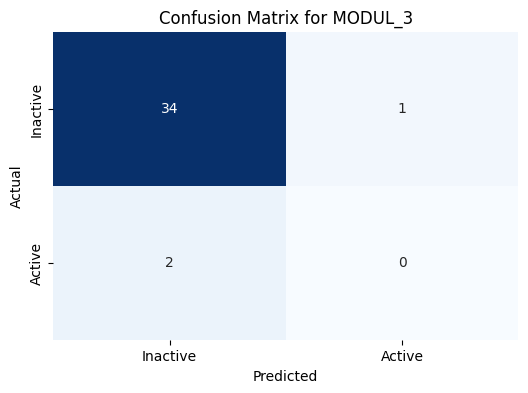

Modul: MODUL_4
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        34
         1.0       0.50      0.33      0.40         3

    accuracy                           0.92        37
   macro avg       0.72      0.65      0.68        37
weighted avg       0.91      0.92      0.91        37



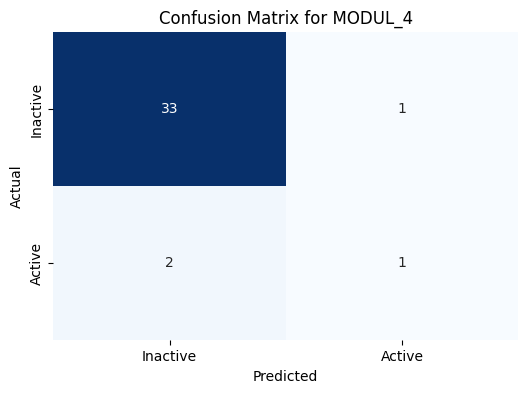

Modul: MODUL_5
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        28
         1.0       0.00      0.00      0.00         9

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



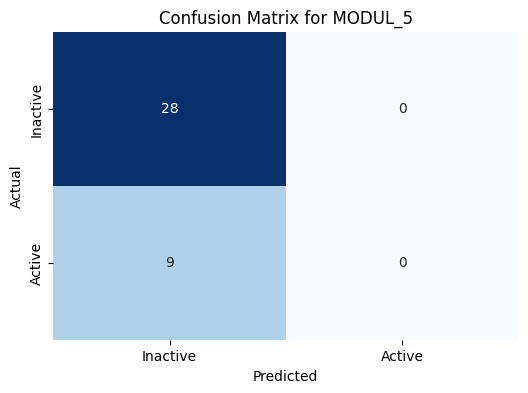

Modul: MODUL_6
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        28
         1.0       0.00      0.00      0.00         9

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



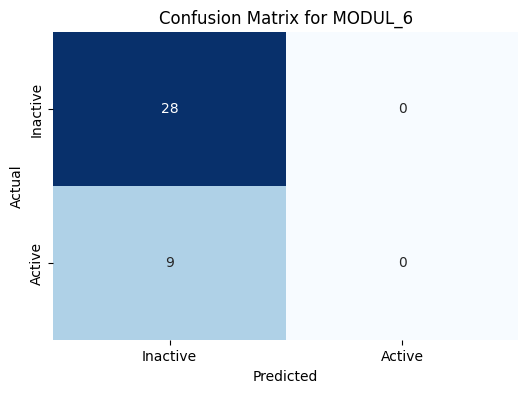

Modul: MODUL_7
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        28
         1.0       0.00      0.00      0.00         9

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



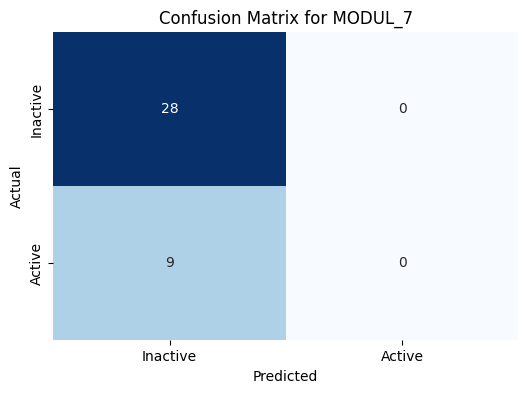

Modul: MODUL_8
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        31
         1.0       0.00      0.00      0.00         6

    accuracy                           0.84        37
   macro avg       0.42      0.50      0.46        37
weighted avg       0.70      0.84      0.76        37



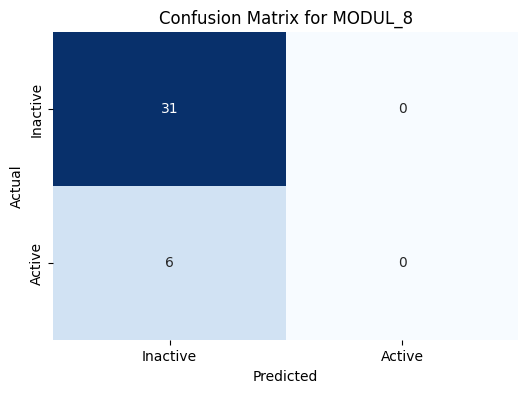

Modul: MODUL_9
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        32
         1.0       0.00      0.00      0.00         5

    accuracy                           0.84        37
   macro avg       0.43      0.48      0.46        37
weighted avg       0.74      0.84      0.79        37



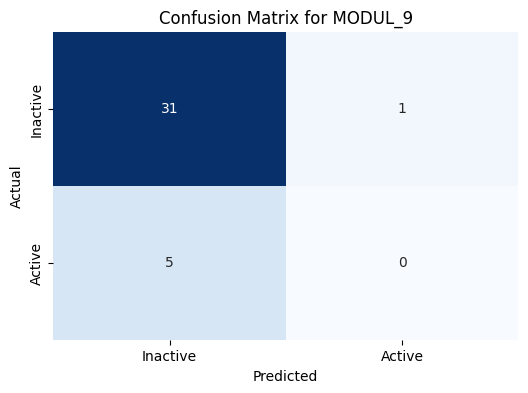

Modul: MODUL_10
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        32
         1.0       0.00      0.00      0.00         5

    accuracy                           0.86        37
   macro avg       0.43      0.50      0.46        37
weighted avg       0.75      0.86      0.80        37



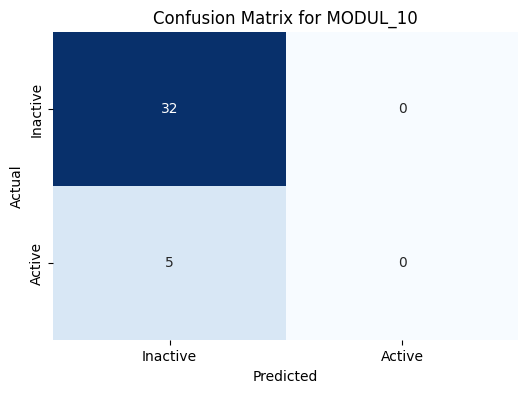

Modul: MODUL_11
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        36
         1.0       0.00      0.00      0.00         1

    accuracy                           0.89        37
   macro avg       0.49      0.46      0.47        37
weighted avg       0.94      0.89      0.92        37



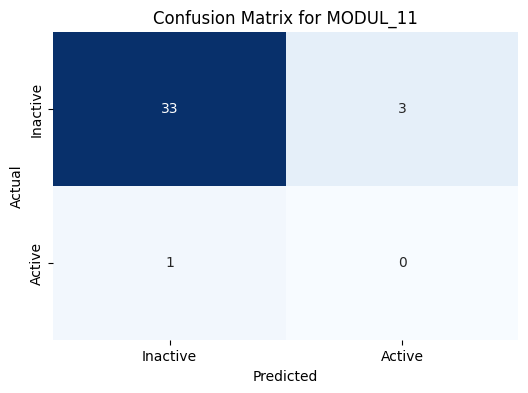

Modul: MODUL_12
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        34
         1.0       0.00      0.00      0.00         3

    accuracy                           0.92        37
   macro avg       0.46      0.50      0.48        37
weighted avg       0.84      0.92      0.88        37



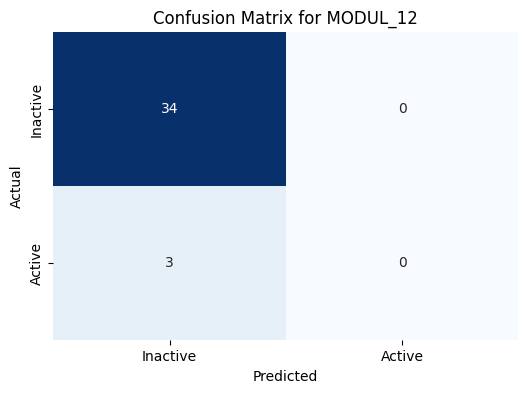

In [ ]:
# Mengonversi semua nilai dalam kolom TEMPERATURE menjadi string terlebih dahulu
df_cleaned['TEMPERATURE'] = df_cleaned['TEMPERATURE'].astype(str)

# Mengekstraksi angka dari nilai string dan mengonversinya menjadi numerik
df_cleaned['TEMPERATURE'] = pd.to_numeric(df_cleaned['TEMPERATURE'].str.extract('(\d+)')[0], errors='coerce')

# Memisahkan fitur dan label
columns_to_exclude = [f'MODUL_{i}' for i in range(1, 13)] + ['TANGGAL_PELAKSANAAN']
X = df_cleaned.drop(columns=columns_to_exclude)
labels = [f'MODUL_{i}' for i in range(1, 13)]
y = df_cleaned[labels]

# Menangani nilai NaN pada fitur dengan menggunakan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi model untuk setiap modul
for label in labels:
    print(f'Modul: {label}')

    # Memisahkan label saat ini
    y_current = y[label]

    # Membagi dataset menjadi training set dan test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_current, test_size=0.2, random_state=42)

    # Melatih model Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Memprediksi dengan model
    y_pred = rf.predict(X_test)

    # Evaluasi model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[label] = report

    # Menampilkan laporan klasifikasi
    print(classification_report(y_test, y_pred))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=["Inactive", "Active"], yticklabels=["Inactive", "Active"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {label}')
    plt.show()

Dari hasil evaluasi untuk setiap modul yang Anda sajikan, ada beberapa pola yang dapat diperhatikan:

1. Modul dengan Akurasi Tinggi: Beberapa modul seperti MODUL_1, MODUL_3, MODUL_4, MODUL_8, MODUL_9, MODUL_10, dan MODUL_12 memiliki tingkat akurasi yang relatif tinggi, dengan nilai f1-score yang baik untuk kelas mayoritas (0.0) tetapi memiliki recall yang rendah untuk kelas minoritas (1.0). Ini menunjukkan bahwa model cenderung lebih baik dalam mengidentifikasi kelas mayoritas (0.0) daripada kelas minoritas (1.0).

2. Modul seperti MODUL_5, MODUL_6, MODUL_7 menunjukkan kinerja yang lebih rendah dengan f1-score yang rendah untuk kedua kelas. Ini menunjukkan bahwa model mungkin memiliki kesulitan dalam membedakan antara kelas 0 dan 1 untuk modul-modul ini. Perbaikan dalam kinerja mungkin memerlukan lebih banyak pengaturan hyperparameter atau penanganan khusus untuk kelas minoritas.

3. Keseluruhan Tren: Secara umum, model tampaknya lebih baik dalam mengklasifikasikan kelas mayoritas (0.0) daripada kelas minoritas (1.0) untuk hampir semua modul. Ini dapat disebabkan oleh ketidakseimbangan kelas di dataset, di mana jumlah sampel untuk kelas minoritas (1.0) lebih sedikit dibandingkan dengan kelas mayoritas (0.0).

In [ ]:
# Data baru yang akan diprediksi
new_data = np.array([[0.97, 223, 197, 33, 127, 131, 8, 50, 31, 0.3, 1.7, 1.9, 5.5]])

# Melakukan imputer pada data baru (menggunakan mean dari data yang dilatih jika ada NaN)
new_data_imputed = imputer.transform(new_data)

# Melakukan prediksi untuk setiap modul menggunakan model yang telah dilatih
predictions = {}
for label in labels:
    rf = RandomForestClassifier(random_state=42)
    y_current = y[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y_current, test_size=0.2, random_state=42)
    rf.fit(X_train, y_train)

    # Prediksi data baru
    prediction = rf.predict(new_data_imputed)
    predictions[label] = prediction[0]

# Menampilkan hasil prediksi
print("Hasil Prediksi untuk Data Baru:")
for label, prediction in predictions.items():
    status = "Active" if prediction == 1 else "Inactive"
    print(f"{label}: {status}")


Hasil Prediksi untuk Data Baru:
MODUL_1: Active
MODUL_2: Active
MODUL_3: Inactive
MODUL_4: Inactive
MODUL_5: Inactive
MODUL_6: Inactive
MODUL_7: Inactive
MODUL_8: Inactive
MODUL_9: Active
MODUL_10: Inactive
MODUL_11: Inactive
MODUL_12: Inactive


## **Hasil Analisis Modelling**

**Penjelasan SMOTE**

SMOTE, atau Synthetic Minority Over-sampling Technique, adalah teknik yang digunakan untuk menangani masalah ketidakseimbangan kelas dalam dataset. Ketidakseimbangan kelas terjadi ketika satu atau lebih kelas memiliki jumlah contoh yang jauh lebih sedikit dibandingkan kelas lainnya, yang dapat menyebabkan model machine learning menjadi bias terhadap kelas mayoritas. SMOTE mengatasi masalah ini dengan membuat contoh sintetis dari kelas minoritas. Teknik ini bekerja dengan memilih dua atau lebih contoh yang ada di kelas minoritas dan menciptakan contoh baru yang berada di antara titik-titik yang dipilih, sehingga meningkatkan jumlah contoh di kelas minoritas dan membantu model untuk belajar dari distribusi data yang lebih seimbang.

**Analisis dan Pemilihan Model dengan SMOTE**

Dari hasil classification report, terlihat bahwa model yang menggunakan SMOTE menunjukkan performa yang lebih seimbang antara kelas mayoritas dan minoritas dibandingkan dengan model tanpa SMOTE. Penggunaan SMOTE membantu dalam meningkatkan recall dan precision untuk kelas minoritas, yang sering kali diabaikan dalam model tanpa teknik ini. Dalam kasus model tanpa SMOTE, terlihat bahwa metrik seperti recall untuk kelas minoritas sering kali sangat rendah atau bahkan nol, yang menunjukkan bahwa model tidak dapat mengenali atau memprediksi kelas tersebut dengan baik. Sebaliknya, model yang menggunakan SMOTE memiliki metrik yang lebih merata, menunjukkan bahwa model dapat mengenali dan memprediksi kedua kelas dengan lebih baik. Oleh karena itu, untuk pembuatan web, model dengan penggunaan SMOTE akan dipilih karena memberikan hasil prediksi yang lebih akurat dan adil terhadap semua kelas, memastikan bahwa baik kelas mayoritas maupun minoritas diwakili dengan baik dalam prediksi model.

